In [9]:
#importing necessary libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from pandas.plotting import lag_plot
from sklearn import cross_validation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from matplotlib.ticker import FormatStrFormatter

# Haberman dataset

The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Age of patient at time of operation (numerical)

Patient's year of operation (year - 1900, numerical)

Number of positive axillary nodes detected (numerical)

Survival status (class attribute)

1 = the patient survived 5 years or longer

2 = the patient died within 5 year

In [28]:
#loading and exploring data
df = pd.read_csv('haberman.csv', sep=',')
df.columns = ['Age', 'Year operation', 'Axillary nodes detected', 'Survival status']

#features = []
print(df.info())
print(df.describe())
print(df.dtypes)
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
Age                        306 non-null int64
Year operation             306 non-null int64
Axillary nodes detected    306 non-null int64
Survival status            306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB
None
              Age  Year operation  Axillary nodes detected  Survival status
count  306.000000      306.000000               306.000000       306.000000
mean    52.457516       62.852941                 4.026144         1.264706
std     10.803452        3.249405                 7.189654         0.441899
min     30.000000       58.000000                 0.000000         1.000000
25%     44.000000       60.000000                 0.000000         1.000000
50%     52.000000       63.000000                 1.000000         1.000000
75%     60.750000       65.750000                 4.000000         2.000000
max     83.000000       69.000000                52.000000   

,Age,Year operation,Axillary nodes detected,Survival status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [11]:
df['Survival status'] = df['Survival status'].map({1:"survived",2:"Not survived"})
print(df['Survival status'].value_counts())

survived        225
Not survived     81
Name: Survival status, dtype: int64


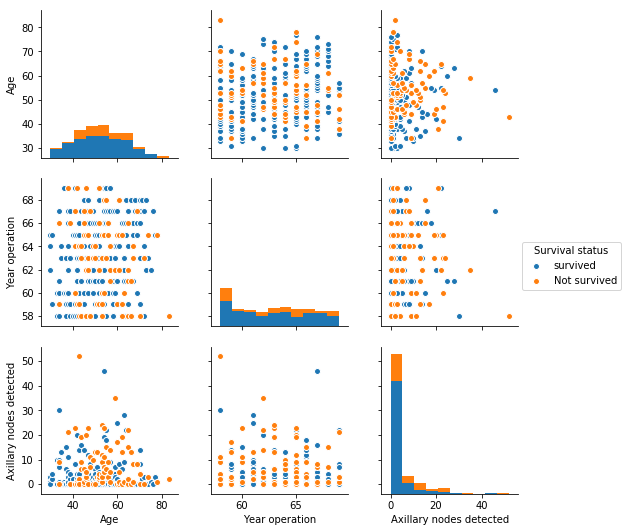

In [12]:
# dataset is 'clean', we don't have NaN and all data is int
#futher data exploration with different plots
sns.pairplot(df, hue = 'Survival status')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000283CFDE0DA0>,
      dtype=object)

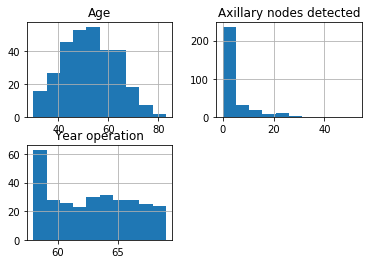

In [13]:
df.hist()

C:\Users\BIONIC_Admin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\BIONIC_Admin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


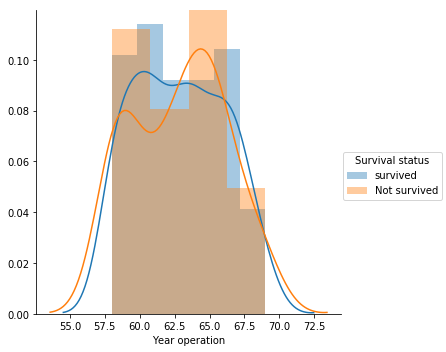

In [14]:
sns.FacetGrid(df, hue="Survival status", size=5) \
   .map(sns.distplot, "Year operation") \
   .add_legend()

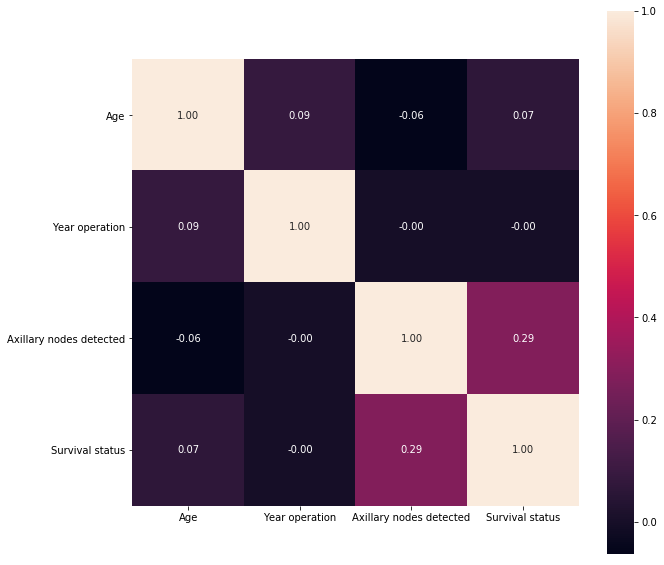

In [30]:
cm = np.corrcoef(df.T)
plt.figure(figsize=(10,10))
heatmap = sns.heatmap(cm, cbar=True, annot=True, square=True,
                         fmt='.2f', annot_kws={'size':10}, xticklabels=df.columns, yticklabels=df.columns)

In [ ]:
#we see low level of correlation between our variables

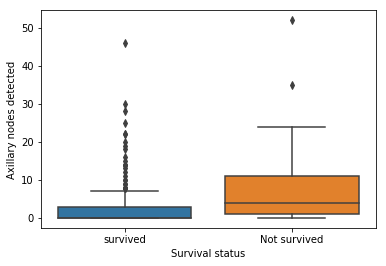

In [19]:
sns.boxplot(x='Survival status',y='Axillary nodes detected', data=df)


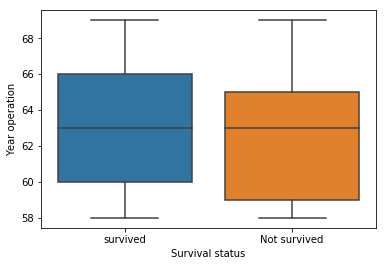

In [20]:
sns.boxplot(x='Survival status',y='Year operation', data=df)


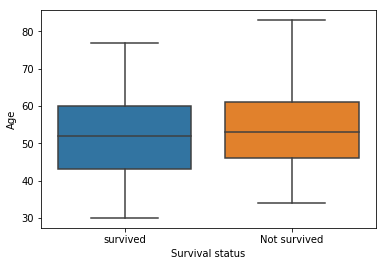

In [21]:
sns.boxplot(x='Survival status',y='Age', data=df)


In [22]:
arr = df.values
X = arr[:,:3]
Y = arr[:,3]
validation_size = 0.20
seed = 42
X_train, X_validation, Y_train, Y_validation = cross_validation.train_test_split(X, Y, 
test_size=validation_size, random_state=seed)

In [23]:
models = []
lr = LogisticRegression()
knn = KNeighborsClassifier()
cart = DecisionTreeClassifier()
nb = GaussianNB()
svm = SVC()
nn = MLPClassifier()
rfc = RandomForestClassifier()
models.append(('LR', lr))
models.append(('KNN', knn))
models.append(('CART', cart))
models.append(('NB', nb))
models.append(('SVM', svm))
models.append(('NN', nn))
models.append(('RFC', rfc))

In [24]:
res = []
model = []
for mdln, mdl in models:
    kfold = cross_validation.KFold(n=len(X_train), n_folds=20, random_state=42)
    cv_res = cross_validation.cross_val_score(mdl, X_train, Y_train, cv=kfold, scoring='accuracy')
    res.append(cv_res)
    model.append(mdln)
    modelres = "%s: %f (%f)" % (mdln, cv_res.mean(), cv_res.std())
    print(modelres)

LR: 0.760897 (0.096263)
KNN: 0.697756 (0.123791)
CART: 0.661859 (0.138480)
NB: 0.757051 (0.110266)
SVM: 0.736538 (0.120692)
NN: 0.732051 (0.109962)
RFC: 0.716026 (0.122587)


In [25]:
#we obtained the best cross validation result from LogisticRegression

In [26]:
thebest =  lr
thebest.fit(X_train, Y_train)
predictions = thebest.predict(X_validation)
print(accuracy_score(Y_validation, predictions))

print(classification_report(Y_validation, predictions))

0.6935483870967742
              precision    recall  f1-score   support

Not survived       0.43      0.17      0.24        18
    survived       0.73      0.91      0.81        44

 avg / total       0.64      0.69      0.64        62



In [ ]:
#Model based on LogisticRegression predicts the status of survival with an index of 64%